In [14]:
import cv2
import os, glob
from matplotlib import pyplot as plt
import numpy as np
from knn import knnDriver
from basicColoringAgent import getAll3x3,heapSort,setAll6, isMajority, getAvgValueLeft
def plot(img, title = 'Plot', scale=1):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4*scale,6*scale))
    plt.title(title)
    plt.imshow(img)

image = glob.glob('*.jpg')
image = image[0]

In [15]:

print('Found: ' + image)

imData = cv2.imread(image)




Found: Beach.jpg


In [16]:
# plot(r, scale=2)
# plot(g, scale=2)

resX = imData.shape[1]
resY = imData.shape[0]
print(imData.shape)

halfPoint = int(resX/2)
trainImage = imData[:,:halfPoint,:]
testImage = imData[:,halfPoint:,:]



(1440, 2560, 3)


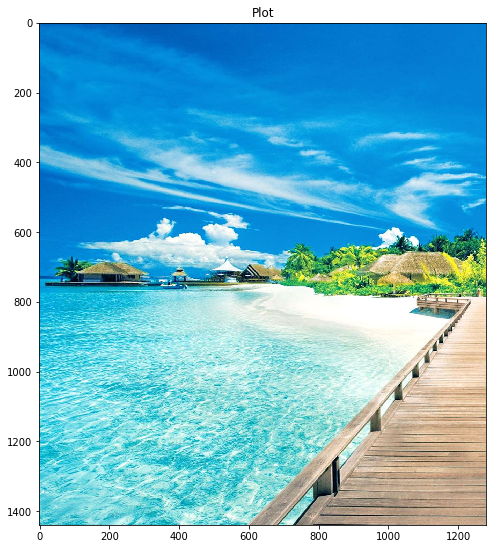

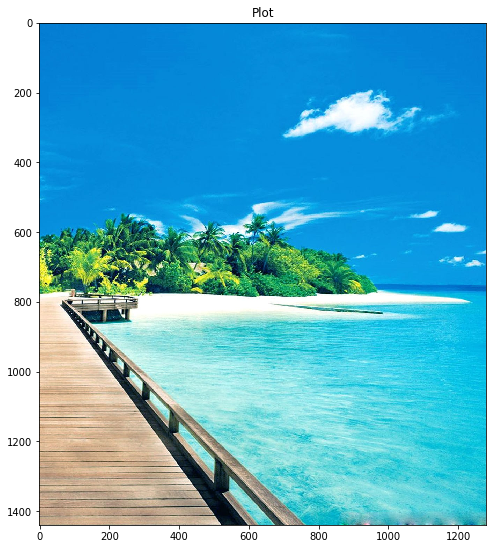

In [17]:
plot(trainImage,scale=2)
plot(testImage,scale=2)

In [18]:
def recolorGrayscale(testImage,trainImage):
    testImageGray = cv2.cvtColor(testImage, cv2.COLOR_BGR2GRAY)
    trainImageGray = cv2.cvtColor(trainImage, cv2.COLOR_BGR2GRAY)
    return [trainImageGray, testImageGray]

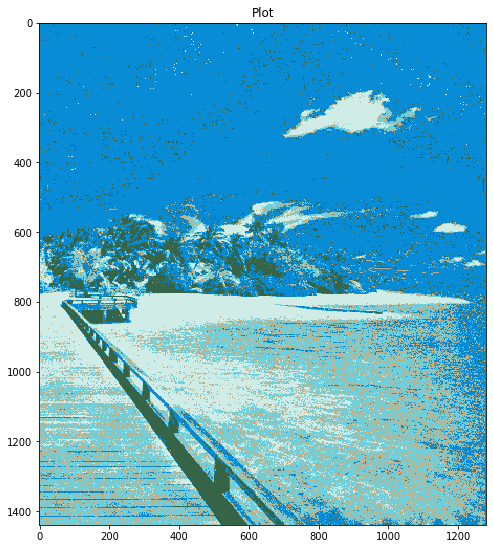

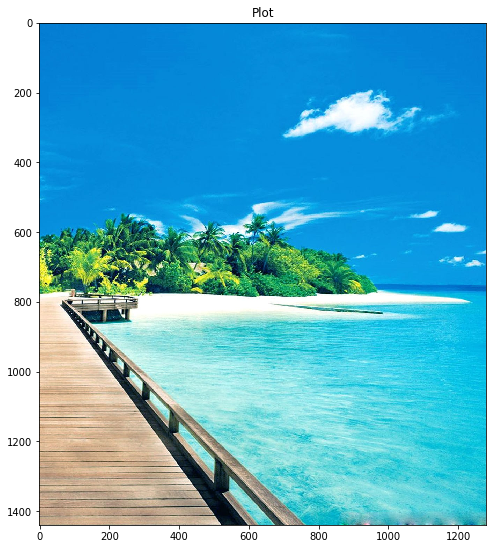

In [19]:


def recolorTraining(pixelClusterGrid, clusterBGRValues, testImage):
    
    cluster0Val = clusterBGRValues[0]
    cluster1Val = clusterBGRValues[1]
    cluster2Val = clusterBGRValues[2]
    cluster3Val = clusterBGRValues[3]
    cluster4Val = clusterBGRValues[4]

    bRight = testImage[:,:,0]
    gRight = testImage[:,:,1]
    rRight = testImage[:,:,2]
    rowLim = pixelClusterGrid.shape[0] - 1
    colLim = pixelClusterGrid.shape[1] - 1
    for i in range(0, rowLim , 1):
        for j in range(0, colLim , 1):
            # print('testImage', testImage[i][j])
            pixel = pixelClusterGrid[i][j]
            # print('Pixel', pixel)
            if pixel == 0:
                rRight[i][j] = cluster0Val[2]
                gRight[i][j] = cluster0Val[1]
                bRight[i][j] = cluster0Val[0]
            elif pixel == 1:
                rRight[i][j] = cluster1Val[2]
                gRight[i][j] = cluster1Val[1]
                bRight[i][j] = cluster1Val[0]
            elif pixel == 2:
                rRight[i][j] = cluster2Val[2]
                gRight[i][j] = cluster2Val[1]
                bRight[i][j] = cluster2Val[0]
            elif pixel == 3:
                rRight[i][j] = cluster3Val[2]
                gRight[i][j] = cluster3Val[1]
                bRight[i][j] = cluster3Val[0]
            elif pixel == 4:
                rRight[i][j] = cluster4Val[2]
                gRight[i][j] = cluster4Val[1]
                bRight[i][j] = cluster4Val[0]
    
    outImage = np.zeros_like(testImage)
    outImage[:,:,0] = bRight
    outImage[:,:,1] = gRight
    outImage[:,:,2] = rRight

    return outImage

payload = knnDriver(trainImage)
# print(payload)
pixelClusterGrid = payload[0]
avgValues = payload[1]

payload = recolorGrayscale(testImage, trainImage)
grayTrain = payload[0]; grayTest = payload[1]

left = getAll3x3(grayTrain)
right = getAll3x3(grayTest)
pixelClusterGridTest = np.zeros_like(grayTest)
heapSort(right)
heapSort(left)

setAll6(left,right)

for grid in right:
    res = isMajority(grayTrain,grid)
    if res != -1:
        value = grid.close6[res].value/9
        pixel = grid.close6[res]
    else:
        res = getAvgValueLeft(grayTrain,grid)
        value = res[0]
        pixel = grid.close6[res[1]]
    
    clusterBelongTo = pixelClusterGrid[pixel.X][pixel.Y]
    i = grid.X - 1
    j = grid.Y - 1
    for a in range(0,3):
        for b in range(0,3):
            pixelClusterGridTest[i+a][j+b] = clusterBelongTo
    


out = recolorTraining(pixelClusterGridTest, avgValues, trainImage)

plot(out, scale=2)
plot(testImage, scale=2)

